Python机器学习
===
对于某给定的任务T，在合理的性能度量方案P的前提下，某计算机程序可以自主学习任务T的经验E

# 1.算法分类
## 1.1.第一种算法分类
### 1.1.1.有监督学习
有训练数据集。KNN、决策树、回归等等
- 判别方法：决策树、支持向量机、K近邻、逻辑回归
- 生成方法：朴素贝叶斯、HMM(隐马尔可夫模型)、GMM(高斯混合模型)

判别方法可以告诉测试数据的具体分类，生成方法会告诉测试数据数据任何一个分类的概率

生成模型：无穷样本->概率密度模型->产生模型->预测

判别模型：有限样本->判别函数->预测模型->预测

生成模型更普适、判别模型更直接；生成方法关注数据是如何产生的，寻找的是数据分布模型，判别方法关注数据的差别，
寻找的是分类面；由生成模型可以得到判别式模型，但由判别式模型得不到生成式模型

### 1.1.2.无监督学习
没有训练数据集。聚类等等

### 1.1.3.半监督学习
强化学习。人学走路。

## 1.2.第二种分类方法
### 1.2.1.分类和回归
预测算法，最终生成一个模型。预测的变量是连续型数据变量，就是回归；如果是离散型的数据变量，那就是分类。这里所
说的变量，是表示类别的应变量，不是表示特征的因变量
- 回归算法：线性回归、广义线性回归
- 分类算法：逻辑回归、支持向量积、决策树

### 1.2.2.聚类

### 1.2.3.关联分析

### 1.2.4.降维

# 2.解决问题的框架
定义目标、定义模型、定义损失函数、训练样本、优化。

模型、目标和算法

# 3.损失函数和正则化
## 3.1.损失函数
- 损失：预测值和真实结果的差异

我们的目标就是使得损失最小，能够标识损失的函数就是损失函数

## 3.2.过拟合
在训练数据上表现特别好，但是应用到测试数据上就会特别差。所以损失最小不是唯一目标，因为这样会导致过拟合

## 3.3.偏差与方差
- 偏差bias:预测值的均值与实际值的差，反应的是模型本身的优劣
- 方差variance：预测结果本身的方差，反应的事算法性能的优劣

![images](images/00_01_001.png)

过拟合=低偏差+高方差

## 3.4.损失函数的一般形式
结构风险=经验风险+惩罚项(正则化项),$J(\omega)=\sum_iL(m_i(\omega))+\lambda{R(\omega)}$，其中$m_i$是损失值，对于连续变量，也就是回归
问题，损失项可以用预测值和真实值的差值来表示；但是对于离散型的分类问题，损失项不能简单的用差值表示，我们主要
讨论分类问题，所以就有
$$
\begin{cases}
&m_i=y^{(i)}f_\omega(x^{(i)})\\\\
&y^{(i)} \in {-1,1}\\\\
&f_\omega(x^{(i)})=\omega^Tx^{(i)}
\end{cases}
$$
$L(m_i(\omega))$是最初始的损失函数，也就是真实值与预测值之间的差异，也叫做经验风险；$R(\omega)$是关于回归参数的一个函
数，也叫做正则化。对于岭回归，就是参数的平方函数，对于lasso回归，就是参数的绝对值函数；

通常正则化分为两种：L1-参数的平方函数；L2-参数的绝对值函数.L1的效果是使得模型比较简单，可以进行参数选择，还可
以避免过拟合；L2只能起到一个避免过拟合的作用

### 3.4.1.0~1-Loss
基线，适用于二分类问题；二分类问题一般我们计算的都是P(y=1)的概率，对于P(y=0)的概率，使用的是1-P(y=1)。其实判
别方法得到的都是正例的概率，也就是我们最关心的结果。
$$
L_{01}(m)=\begin{cases}
0 &m \geq 0\\\\
1 & m \le 0
\end{cases}
$$
m就是预测结果；当$m \geq 0$的时候，预测$\hat{y}=1$，否则预测$\hat{y}=-1$,数据本来的真实值我们关心的就是$y=1$的正例情况，
所以当$m \geq 0$的时候，预测值和真实值没有差距，所以损失函数就是0，如果当$m \le 0$，那么损失函数就是1

### 3.4.2.Hinge Loss-折页损失
SVM使用的就是Hinge Loss。$\ell(y)=max(0, 1- t * y)$, y代表数据的真实分类；t代表计算出来的值，也就是m计算出来的
值，约束条件为
$$
t(x)=\begin{cases}
1 & m \geq 0\\\\
-1 & m \le 0
\end{cases}
$$
$y \in \{-1,1\}$这是单个样本的损失值，至于整体样本的损失值，为$L(y)=\frac{1}{n}\sum_{i=1}^n\ell(y)$可以看出当$t \geq 1$的时候，$\ell(y)$一直取
值0，相当于对于整体的损失是没有影响的。只有当$t \le 1$的时候，才会对整体的损失有影响.更深入一下，我们知道t可以分为3段,分
别可以得到三个预测结果。
$$
\hat{y}=\begin{cases}
1 & t \geq 1\\\\
1 & 0 \leq t \leq 1\\\\
-1 & t \le 0
\end{cases}
$$
具体到SVM中，当$t \geq 1$的时候，所对应的就是在支撑平面外面的点，这些点肯定对损失函数是没有任何影响的；当
$0\leq t\leq 1$，所对应的就是支撑平面上的点，这些点必然也是对损失函数没有影响；$t \le 0$对应的就是在支撑平面中间的点，
以及完全分错的那些点，只有这些点才会对损失函数有影响

### 3.4.3.Log Loss-对数损失、交叉熵损失
逻辑回归用的就是Log Loss,使用的就是用-1乘以对数似然函数，然后取最小值
$$L(w)=-\frac{1}{N}\sum_{n=1}^NH(p_n,q_n)=-\frac{1}{N}\sum_{n=1}^N[y_nlog\hat{y}_n+(1-y_n)log(1-\hat{y}_n)]$$
信息论中叫做交叉熵。对于Log Loss来说，所有的样本都会对损失函数有影响。

### 3.4.4.Exp Loss-指数Loss
AdaBoost算法使用的就是Exp Loss

### 3.4.5.Square Loss
使用的不是很多
$$L(y,f(x))=(y-f(x))^2$$
因为把0预测成1和把0预测成8，对于0-1损失是一样的，但是对于平方损失是不一样的，这是不合理的

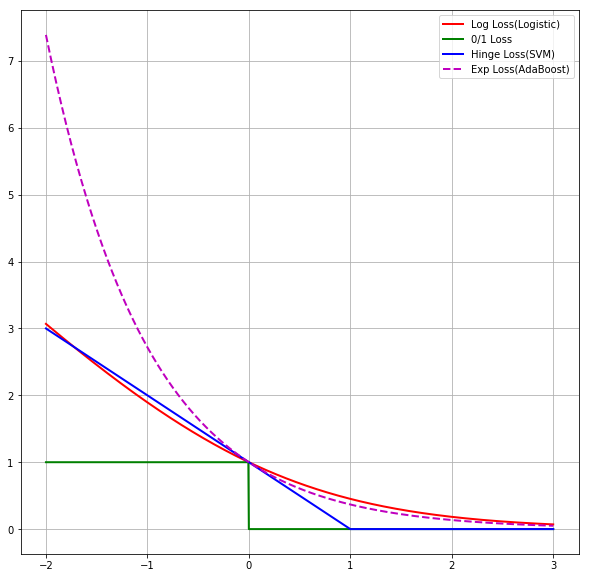

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
x = np.array(np.linspace(start=-2, stop=3, num=1001, dtype=np.float))
y_logit = np.log(1 + np.exp(-x)) / math.log(2)
y_boost = np.exp(-x)
y_01 = x < 0
y_hinge = 1.0 - x
y_hinge[y_hinge < 0] = 0
plt.figure(figsize=(10, 10), facecolor='w')
plt.plot(x, y_logit, 'r-', label='Log Loss(Logistic)', linewidth=2)
plt.plot(x, y_01, 'g-', label='0/1 Loss', linewidth=2)
plt.plot(x, y_hinge, 'b-', label='Hinge Loss(SVM)', linewidth=2)
plt.plot(x, y_boost, 'm--', label='Exp Loss(AdaBoost)', linewidth=2)
plt.grid()
plt.legend(loc='upper right')